In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Sales_LinReg.csv')
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [3]:
data.shape

(305, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [5]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [6]:
data['Republic'] = data['Republic'].fillna(data['Republic'].mean())
data['NDTV'] = data['NDTV'].fillna(data['NDTV'].mean())
data['TV9'] = data['TV9'].fillna(data['TV9'].mean())
data['AajTak'] = data['AajTak'].fillna(data['AajTak'].mean())

In [7]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


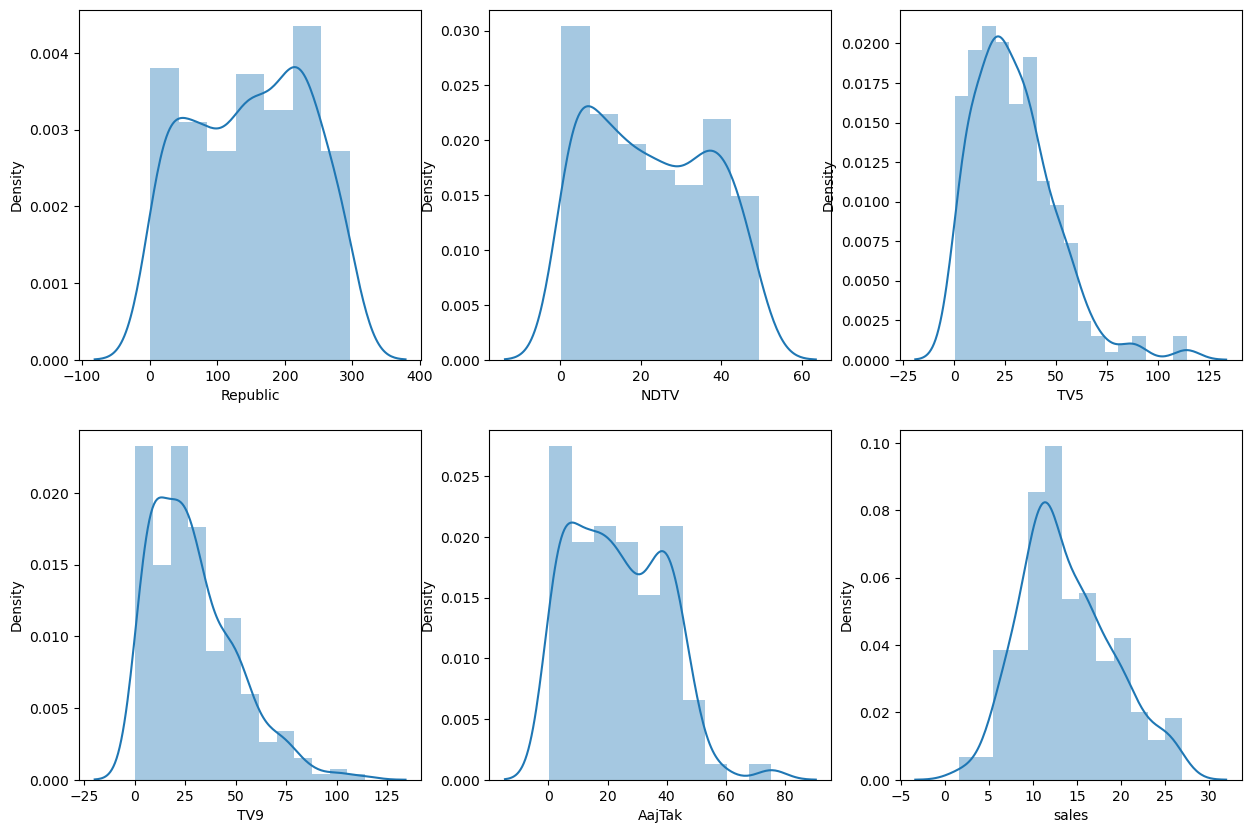

In [8]:
plt.figure(figsize=(15,10))
plotnumber=1
for columns in data:
    if plotnumber<=7:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns)
        
    plotnumber+=1
plt.show()    

In [42]:
x = data.drop(columns=['sales'])
y= data['sales']

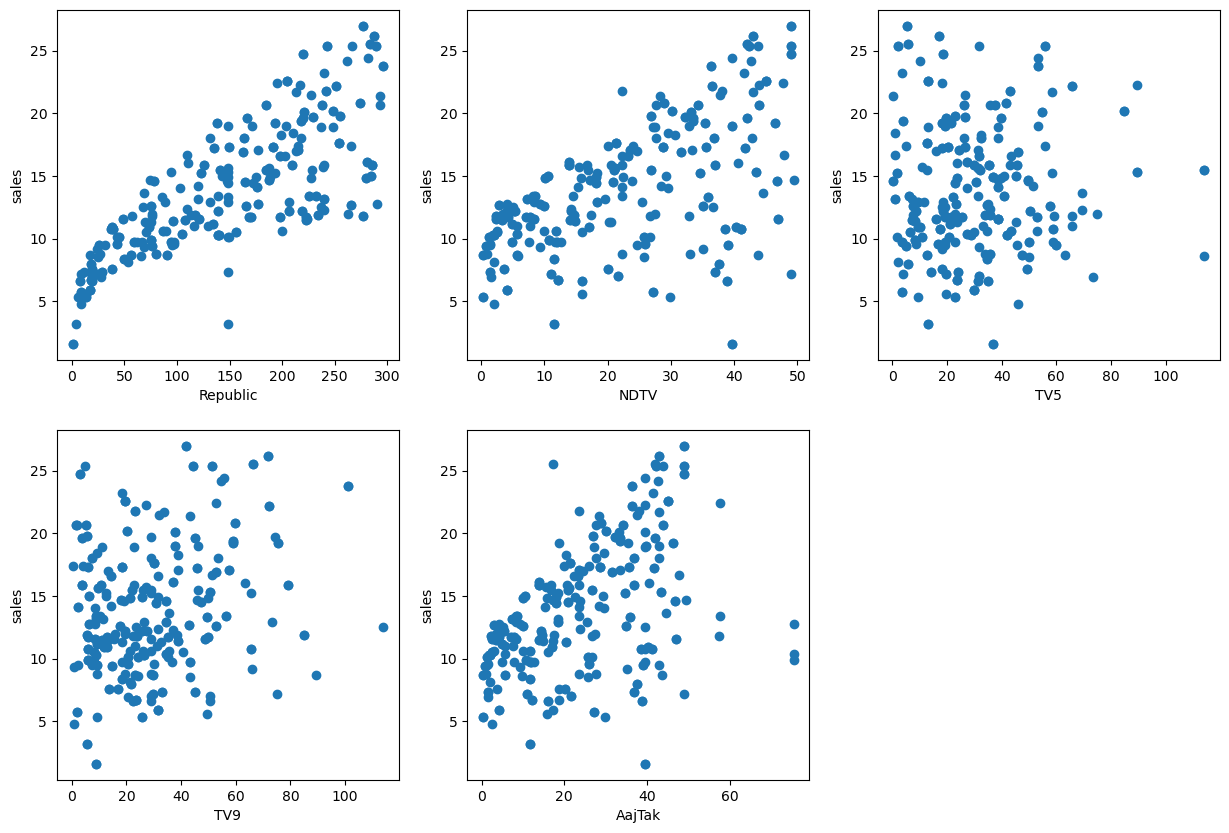

In [43]:
plt.figure(figsize =(15,10))
plotnumber=1

for column in x:
    if plotnumber<=7:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('sales')
    plotnumber+=1
    
plt.show()    

I am not able to see relationship in TV9 and sales and TV5 and sales

In [44]:
x.drop(columns=['TV9','TV5'],inplace=True)
x

,Republic,NDTV,AajTak
0,8.7,48.9,49.0
1,57.5,32.8,57.5
2,120.2,19.6,18.5
3,8.6,2.1,2.6
4,199.8,2.6,2.9
...,...,...,...
300,286.0,13.9,13.9
301,18.7,12.1,18.7
302,39.5,41.1,39.5
303,75.5,10.8,75.5


In [45]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)


In [66]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=234)

In [67]:
reg_model = LinearRegression()

reg_model.fit(x_train,y_train)

LinearRegression()

In [77]:
x.head(2)

,Republic,NDTV,AajTak
0,8.7,48.9,49.0
1,57.5,32.8,57.5


In [69]:
print('Predict Sales :', reg_model.predict(scaled.transform([[8.7,48.9,49.0]])))

Predict Sales : [12.73570427]


In [72]:
y_train_pred = reg_model.predict(x_train)

In [74]:
y_test_pred = reg_model.predict(x_test)

In [76]:
print(r2_score(y_train,y_train_pred)*100)
print(r2_score(y_test,y_test_pred)*100)

90.33936814965382
73.84779059291382


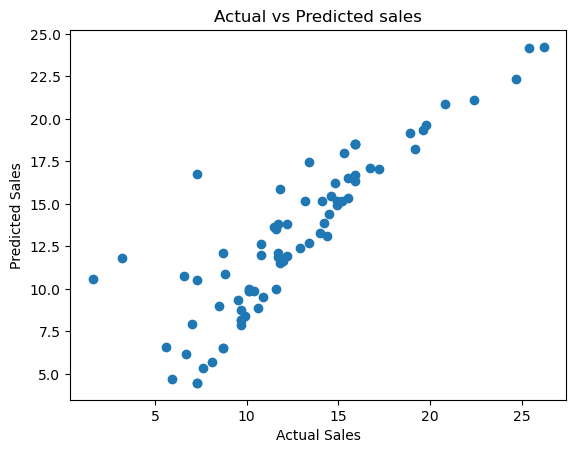

In [78]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted sales')
plt.show()

In [79]:
# Model Evalution

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
mean_absolute_error(y_test,y_test_pred)

1.6083264930789543

In [81]:
mean_squared_error(y_test,y_test_pred)

5.914028612204906

In [82]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

2.431877589889118

In [ ]:
#Regulizatation